## Ejercicio de codificación #0802

### 1. Regresión Softmax con Keras:

In [1]:
# Instalar si es necesario una única vez
# !pip install keras

In [2]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')                              # Desactivar las advertencias.
%matplotlib inline

Using TensorFlow backend.


#### 1.1. Leer los datos y preparar:

In [3]:
# Leer los datos.
data_raw = load_iris()
X = data_raw['data']
y0 = data_raw['target'].reshape(-1,1)

In [4]:
# Codificación One-hot para y.
y = to_categorical(y0, num_classes=3)

In [5]:
# Visualizar como un DataFrame.
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species_0', 'Species_1', 'Species_2']
df = pd.DataFrame(np.concatenate([X,y],axis=1),columns=header)
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [6]:
# Escalar los datos X.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
# Dividir los datos en entrenamiento y pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

#### 1.2. Definir un modelo del API secuencial

In [8]:
# Añadir capas al objeto Sequential
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units = 3, activation="softmax"))    # units = N# of output variables.

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Resumen del modelo.
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Definir los hiperparámetros y el optimizador:

In [10]:
# Hiperparámetros.
n_epochs = 500
batch_size = 10
learn_rate = 0.005

In [11]:
# Definir el optimizador y complilar.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.4. Entrenar el modelo y visualizar la historia:

In [12]:
# Entrenar el modelo.
# verbose = 0 significa sin salida. verbose = 1 para ver las épocas.
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

Instructions for updating:
Use tf.cast instead.


In [13]:
# Visualizar las claves.
my_summary.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

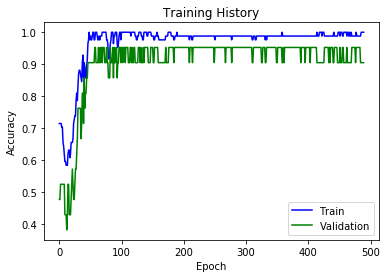

In [15]:
# Visualizar el historial de entrenamiento.
n_skip = 10                 # Omitir los primeros pasos.
plt.plot(my_summary.history['acc'][n_skip:], c="b")
plt.plot(my_summary.history['val_acc'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.5. Pruebas: 

In [16]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.956
